In [44]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from tqdm import tqdm
from typing import List

import cv2

from MirrorExtractor.mirror_extractor import MirrorExtractor
from MirrorFeatureExtractor.mirror_feature_extractor import MirrorFeatureExtractor

In [70]:
RGB_TO_GRAY = np.array([0.299, 0.587, 0.114])

def rgb_to_gray(img_rgb: np.ndarray) -> np.ndarray:
    """Konwersja RGB do skali szarośći metodą weighted average"""
    return np.dot(img_rgb[..., :3], RGB_TO_GRAY).astype(np.uint8)

def get_mirrors_from_event(event_id: int) -> List:
    with h5py.File(h5_output, 'r') as file:
        img_list = [
            rgb_to_gray(file[f"mirrors/{key}/images"][event_id])
            for key in file["mirrors"]
            if len(file[f"mirrors/{key}/images"]) > event_id
        ]
    return img_list
    
def get_laplacian_var(gray):
    """Cechy niezależne od treści odbicia"""
    gray_norm = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    # 1. Ostrość krawędzi - defekty są ostre, odbicia rozmyte
    laplacian_var = cv2.Laplacian(gray_norm, cv2.CV_64F).var()

    return laplacian_var

def get_texture_feat(gray_img):
    gray_norm = cv2.normalize(gray_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    feat_dict = feat_extractor.extract_texture_features(gray_norm)
    return feat_dict



In [15]:
def get_h5_info(h5_path):
    """Wyświetla informacje o datasecie."""
    with h5py.File(h5_path, 'r') as f:
        print(f.keys())
        print(f["mirrors"].keys())
        
def get_img_array(h5_path, grid_id):
    """Zwraca tablice luster o id grid podana przez użytkownika."""
    with h5py.File(h5_path, 'r') as f:
       # print(f"Liczba luster: {f.attrs.get('num_mirrors', 'N/A')}")
        img_array = np.array(f[f"mirrors/{grid_id}/images"])
    return img_array

# Get all images of mirror selected by grid_id
def get_mirror_gray(h5_path, grid_id):
    with h5py.File(h5_path, "r") as file:
        print(file.keys())
        img_rgb_grid_id = np.array(file[f"mirrors/{grid_id}/images"])
        gray_images = np.dot(img_rgb_grid_id[..., :3], [0.299, 0.587, 0.114])
    return gray_images

In [8]:
BASE_DIR = "/home/pgliwny/Praca/Computer_vision_for_MAGIC/"
h5_output = os.path.join(BASE_DIR, "data/data/2025/mirrors_dataset_test3.h5")

In [16]:
img_array_21 = get_mirror_gray(h5_output, "021")
img_array_105 = get_mirror_gray(h5_output, "105")

<KeysViewHDF5 ['mirrors']>
<KeysViewHDF5 ['mirrors']>


In [12]:
get_h5_info(h5_output)

<KeysViewHDF5 ['mirrors']>
<KeysViewHDF5 ['004', '005', '006', '007', '008', '009', '010', '011', '012', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156',

In [16]:
img_array_21.shape

(27, 86, 95, 3)

In [17]:
get_laplacian_var(img_array_21[5, ::])

np.float64(4268.206796756202)

In [18]:
get_laplacian_var(img_array_21[6, ::])

np.float64(2959.13061698395)

In [19]:
get_laplacian_var(img_array_105[5, ::])

np.float64(3777.635894429386)

In [20]:
get_laplacian_var(img_array_105[6, ::])

np.float64(3074.8429972302483)

In [24]:
(3771-3024)/3771

0.19809069212410502

In [14]:
feat_extractor = MirrorFeatureExtractor()

In [22]:
gray_norm = cv2.normalize(img_array_21[6, ::], None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
feat_extractor.extract_texture_features(gray_norm)

{'lbp_mean': np.float64(4.938310893512852),
 'lbp_std': np.float64(2.5286826747949007),
 'lbp_entropy': np.float64(3.164297203821528),
 'glcm_contrast': np.float64(457.3664027709055),
 'glcm_dissimilarity': np.float64(10.49183572488867),
 'glcm_homogeneity': np.float64(0.21359870981005402),
 'glcm_energy': np.float64(0.10548900586391326),
 'glcm_correlation': np.float64(0.9084447246393778)}

In [23]:
gray_norm = cv2.normalize(img_array_21[7, ::], None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
feat_extractor.extract_texture_features(gray_norm)

{'lbp_mean': np.float64(4.912607099143207),
 'lbp_std': np.float64(2.539229575734533),
 'lbp_entropy': np.float64(3.1707145303109763),
 'glcm_contrast': np.float64(494.8031914893618),
 'glcm_dissimilarity': np.float64(12.071622958931222),
 'glcm_homogeneity': np.float64(0.20291202420619872),
 'glcm_energy': np.float64(0.10505045579051032),
 'glcm_correlation': np.float64(0.8968707183090312)}

In [37]:
img_list = []
with h5py.File(h5_output, 'r') as file:
    for key in file["mirrors"].keys():
        img_rgb_grid_id = np.array(file[f"mirrors/{key}/images"])[5, ::]
        gray_images = np.dot(img_rgb_grid_id, [0.299, 0.587, 0.114]).astype(np.uint8)
        img_list.append(gray_images)

In [47]:
event_id = 5

with h5py.File(h5_output, 'r') as file:
    img_list = [
        rgb_to_gray(file[f"mirrors/{key}/images"][event_id])
        for key in file["mirrors"]
        if len(file[f"mirrors/{key}/images"]) > event_id
    ]

In [30]:
gray_images.shape

(27, 110, 108)

In [35]:
img_rgb_grid_id.shape

(110, 108, 3)

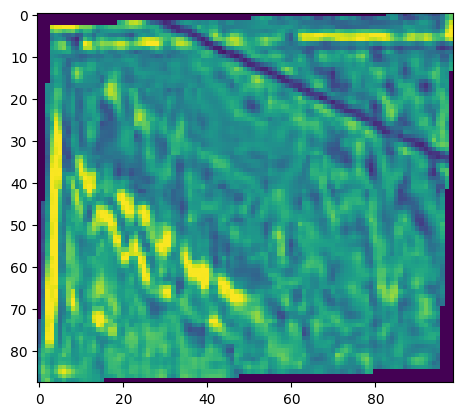

In [48]:
plt.imshow(img_list[25])

In [50]:
mirrors_list_5 = get_mirrors_from_event(5)
mirrors_list_6 = get_mirrors_from_event(6)

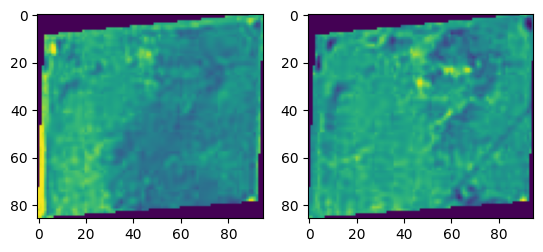

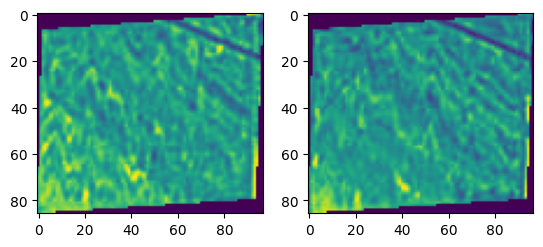

In [55]:
stats_img_a_list = []
for img_a, img_b in zip(mirrors_list_5[10:12], mirrors_list_6[10:12]):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(img_a)
    ax[1].imshow(img_b)
    plt.show()
    

In [58]:
diff_lp_list = []
for img_a, img_b in zip(mirrors_list_5[:], mirrors_list_6[:]):
    lp_var_img_a = get_laplacian_var(img_a)
    lp_var_img_b = get_laplacian_var(img_b)
    diff_lp = np.abs(lp_var_img_a - lp_var_img_b)
    diff_lp_list.append(diff_lp)

In [93]:
diff_f_texture_list = []
feature_name = "glcm_contrast"
for img_a, img_b in zip(mirrors_list_5[:], mirrors_list_6[:]):
    f_texture_img_a = get_texture_feat(img_a)[feature_name]
    f_texture_img_b = get_texture_feat(img_b)[feature_name]
    diff_f_texture = np.abs(f_texture_img_a - f_texture_img_b)
    diff_f_texture_list.append(diff_f_texture)


In [68]:
get_texture_feat(mirrors_list_5[6])

{'lbp_mean': np.float64(4.523918269230769),
 'lbp_std': np.float64(2.5055045233239963),
 'lbp_entropy': np.float64(3.1849351294278083),
 'glcm_contrast': np.float64(621.0775485436893),
 'glcm_dissimilarity': np.float64(17.528762135922328),
 'glcm_homogeneity': np.float64(0.06984090453204435),
 'glcm_energy': np.float64(0.014908920075666228),
 'glcm_correlation': np.float64(0.8247934768647129)}

In [73]:
diff_f_texture

np.float64(0.046885521885521975)

(array([90., 64., 38., 25., 15.,  7.,  5.,  4.,  0.,  1.]),
 array([  1.43374384,  80.74406989, 160.05439593, 239.36472198,
        318.67504802, 397.98537407, 477.29570011, 556.60602616,
        635.9163522 , 715.22667825, 794.53700429]),
 <BarContainer object of 10 artists>)

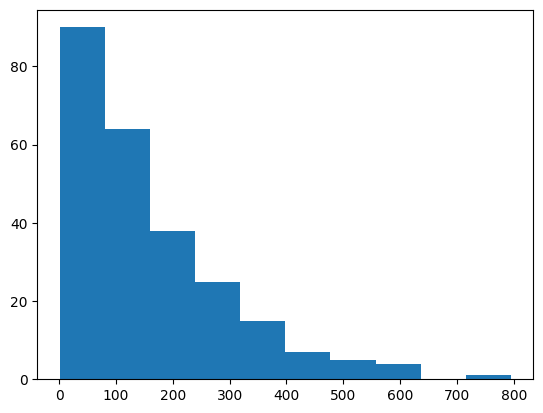

In [94]:
plt.hist(diff_f_texture_list)

{'whiskers': [<matplotlib.lines.Line2D at 0x70154695a550>,
 'caps': [<matplotlib.lines.Line2D at 0x70154695bc90>,
 'boxes': [<matplotlib.lines.Line2D at 0x701546959a10>],
 'medians': [<matplotlib.lines.Line2D at 0x70154695d310>],
 'fliers': [<matplotlib.lines.Line2D at 0x70154695dd90>],
 'means': []}

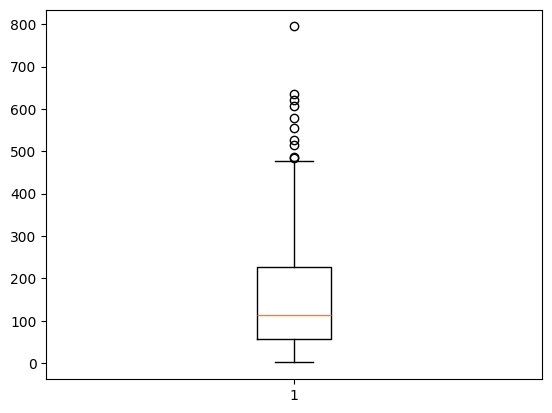

In [95]:
plt.boxplot(diff_f_texture_list)

In [96]:
np.where(np.array(diff_f_texture_list) > 600)

(array([145, 177, 223, 245]),)

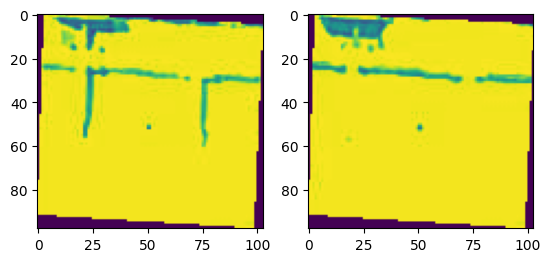

In [91]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(mirrors_list_5[127])
ax[1].imshow(mirrors_list_6[127])
plt.show()

In [53]:
get_laplacian_var(img_a)

np.float64(3169.135175976048)

In [54]:
get_laplacian_var(img_b)

np.float64(3059.184834153495)

In [110]:
get_texture_feat(mirrors_list_5[6])

{'lbp_mean': np.float64(4.523918269230769),
 'lbp_std': np.float64(2.5055045233239963),
 'lbp_entropy': np.float64(3.1849351294278083),
 'glcm_contrast': np.float64(621.0775485436893),
 'glcm_dissimilarity': np.float64(17.528762135922328),
 'glcm_homogeneity': np.float64(0.06984090453204435),
 'glcm_energy': np.float64(0.014908920075666228),
 'glcm_correlation': np.float64(0.8247934768647129)}

# Single event

In [97]:
lp_list = []
for img in mirrors_list_6:
    lp_list.append(get_laplacian_var(img))

In [111]:
f_texture_list = []
feature_name = "lbp_entropy"
for img in mirrors_list_6:
    f_texture_list.append(get_texture_feat(img)[feature_name])

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,
         29.,  95., 119.]),
 array([1.18916408, 1.27200472, 1.35484535, 1.43768599, 1.52052663,
        1.60336726, 1.6862079 , 1.76904853, 1.85188917, 1.93472981,
        2.01757044, 2.10041108, 2.18325172, 2.26609235, 2.34893299,
        2.43177362, 2.51461426, 2.5974549 , 2.68029553, 2.76313617,
        2.8459768 , 2.92881744, 3.01165808, 3.09449871, 3.17733935,
        3.26017999]),
 <BarContainer object of 25 artists>)

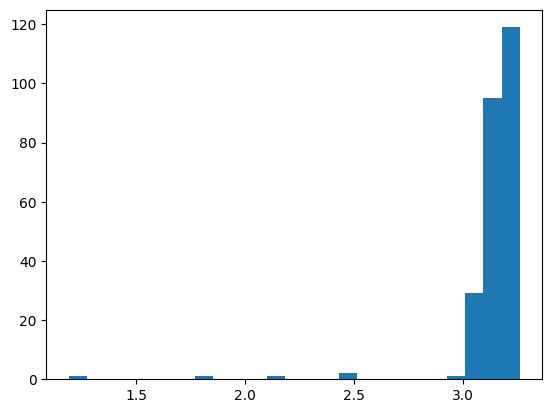

In [112]:
plt.hist(f_texture_list, bins=25)

In [113]:
np.where(np.array(f_texture_list) < 2.5)

(array([ 40,  71, 127, 143, 144]),)

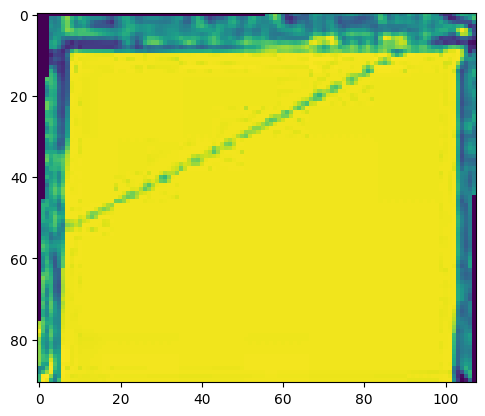

In [116]:
plt.imshow(mirrors_list_5[40])